![seoul and the Han river](./img/seoul.jpg)

![Asia Top Rank](./img/Asia_chart.png)

Have you been to Seoul, the heart of South Korea? It is a wonderful city until you decide to buy your own living space. As we can see above, it is widely known that Seoul's apartments price is infamous and it keeps surging amid the unprecedented COVID-19 outbreak. According to the Hankyung News, the most expensive apartment, "Hannam the Hill", records its real price at \\$6,249,522 (= 7,300,000,000 won), whose price per $m^2$ reaches \\$26,040. (source: https://www.eca-international.com/news/april-2020/taipei-enters-the-top-50-most-expensive-cities-in_/ http://www.hani.co.kr/arti/economy/property/957824.html)

Today, our goal is to predict the apartment located at Seoul considering its address, completion year, transaction date, floor, and surrounding facilities such as child day care centers or parks.

#### Env Setting & Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# import datasets
train = pd.read_csv('./input/train.csv')
day_care_center = pd.read_csv('./input/day_care_center.csv')
park = pd.read_csv('./input/park.csv')
test = pd.read_csv('./input/test.csv')

## Data Exploration

##### (1) train

In [2]:
# (1) train
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [3]:
# check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [4]:
# check missing values
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [5]:
# check descriptive statistics
train.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1216553.00,1216553.00,1216553.00,1216553.00,1216553.00,1216553.00,1216553.00
mean,609153.00,6299.68,78.17,1998.30,201298.44,9.34,38227.69
std,352619.83,3581.17,29.15,8.94,290.57,6.61,31048.98
min,0.00,0.00,9.26,1961.00,200801.00,-4.00,100.00
25%,304138.00,3345.00,59.76,1993.00,201010.00,4.00,19000.00
50%,608276.00,5964.00,82.41,1999.00,201312.00,8.00,30900.00
75%,912414.00,9436.00,84.97,2005.00,201511.00,13.00,47000.00
max,1234827.00,12658.00,424.32,2017.00,201711.00,80.00,820000.00


In [6]:
# check the start and the end date
print('Date ranges from {} to {}'.format(min(train['transaction_year_month']),max(train['transaction_year_month'])))

Date ranges from 200801 to 201711


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFCAFE7FD0>,
      dtype=object)

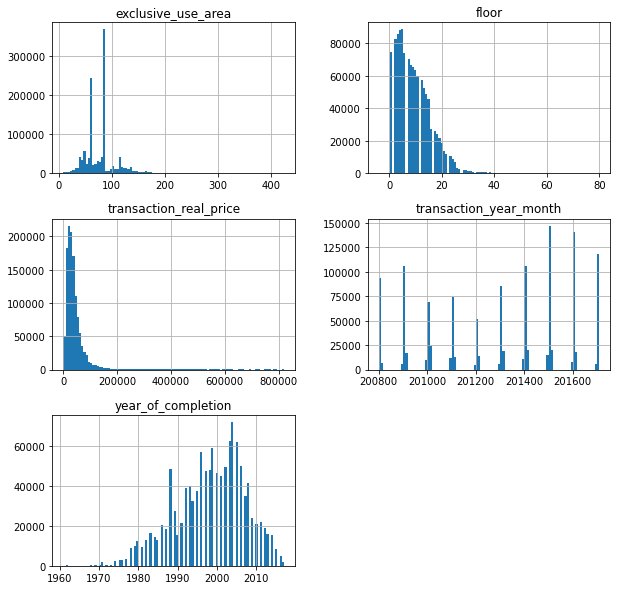

In [7]:
# histogram
train.drop(['apartment_id','transaction_id'],axis=1).hist(bins=100, figsize=(10,10))

In [8]:
# correlations
train.drop(['apartment_id','transaction_id'],axis=1).corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price   1.00
exclusive_use_area       0.56
transaction_year_month   0.18
floor                    0.11
year_of_completion       0.05
Name: transaction_real_price, dtype: float64

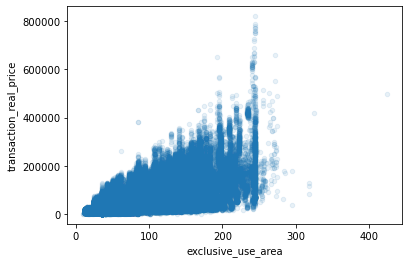

In [9]:
# transaction_real_price & exclusive_use_area plot
train.plot(kind='scatter', x='exclusive_use_area', y='transaction_real_price', alpha=0.1)

**Things to needed to be done later - TRAIN** <br>
1. Can 'floor' be minus? It is not totally weird to find the second basement level in apartments in South Korea. Yet is it possible to have the fourth basement level unless it is not a parking lot? (Yes, we do have a parking lot at the basement level.) Need to check up.
2. Need to split 'transaction_year_month' to year and month columns respectively.
3. Need to categorize transaction_date 
4. Need to proceed one-hot encoding on 'city', 'dong', 'apt', 'year', 'month', 'date'.
5. Cutting out outliers


#### (2) test

In [10]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.55,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.72,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.54,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.54,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.64,2014,201712,11~20,21


In [11]:
# data type
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


**Things to needed to be done later - TEST** <br>
1. Same data without the target variable, transaction real price. 
2. Do the same things as above.

#### (3) Day Care Center

In [12]:
day_care_center.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.00,5.00,1.00,7.00,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.00,5.00,2.00,10.00,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.00,6.00,1.00,32.00,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.00,3.00,0.00,4.00,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.00,7.00,2.00,10.00,N,2018-07-31


In [13]:
# data type
day_care_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [14]:
# descriptive statistics
day_care_center.describe()

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
count,7551.00,7326.00,4352.00,3626.00,5280.00
mean,44.40,9.01,4.53,0.40,6.68
std,37.02,5.81,2.08,0.73,4.48
min,5.00,0.00,0.00,0.00,0.00
25%,19.00,6.00,3.00,0.00,4.00
50%,29.00,7.00,4.00,0.00,5.00
75%,60.00,11.00,5.00,1.00,8.00
max,489.00,98.00,22.00,16.00,53.00


In [15]:
# missing values
day_care_center.isnull().sum().sort_values(ascending=False).head(5)

playground_num          3925
nursing_room_num        3199
CCTV_num                2271
is_commuting_vehicle     496
teacher_num              225
dtype: int64

In [16]:
# day care center type
day_care_center['day_care_type'].value_counts()

가정        3120
민간        2492
국공립       1408
직장         272
법인·단체      113
사회복지법인     107
협동          39
Name: day_care_type, dtype: int64

**Things to needed to be done later - Day Care Center** <br>
1. Create a new column 'day care babies per teacher' by dividing day_care_babies by day_care_teachers and drop two columns.
2. Do One-hot encodings on columns.
3. Create a new column 'unit number of day care center' by dividing total number of day care centers in each gu by corresponding gu area. Will concat this column to other datasets later.
4. Convert columns to the correct data types. 


#### (4) Park

In [17]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.00,NaN,NaN,NaN,NaN,NaN,1944.00,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.00,NaN,NaN,NaN,NaN,NaN,1944.00,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.10,NaN,NaN,NaN,NaN,NaN,1965.00,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.80,NaN,NaN,NaN,NaN,NaN,1968.00,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.20,NaN,NaN,NaN,NaN,NaN,1970.00,2018-08-14


In [18]:
# data type
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [19]:
# missing values
park.isnull().sum().sort_values(ascending=False)

park_cultural_facitiy          1287
park_facility_other            1184
park_benefit_facility          1093
park_exercise_facility         1082
park_entertainment_facility     924
park_open_year                  422
gu                                3
reference_date                    0
park_area                         0
park_type                         0
park_name                         0
dong                              0
city                              0
dtype: int64

In [20]:
# descriptive statistics
park.describe()

,park_area,park_open_year
count,1359.00,937.00
mean,58862.55,1990.15
std,386805.21,17.66
min,22.00,1938.00
25%,1050.25,1977.00
50%,1680.00,1992.00
75%,6609.60,2006.00
max,6692795.00,2018.00


In [21]:
# check missing values - park_cultural_facility
park.park_cultural_facitiy.unique()

array([nan, '문화회관', '무대', '청소년수련원', '홍릉수목원', '도서관', '독서실', '정보화도서관',
       '야외공연장', '없음', '야외무대 장기바둑쉼터 놀이마당',
       '"도서관, 기념비, 충혼탑, 장건상동상, 대한해협전승비, 자연보호헌장, 시민헌장, 충무공이순신영묘비, 노인헌장비, 구덕민속예술관및놀이마당, 기념관, 광복기념관, 청소년수련시설, 최천택기념비, 민주공원표지석, 중앙공원 표지석, 6·25호국유공자기념비, 사적시설, 생태학습원"',
       '"동물원시설, 어린이회관, 학생수련회야영장, 반공전시관, 전시관, 위인탑, 교육문화회관, 박재혁동상, 헌칠학병기념비, 이수현추모비, 어린이교통안전교육장, 부산항일학생의거기념비, 정상구시비, 고태국음악비, 금연테마동산, 상징조형물, 생태학습장, 숲체험학습센터, 소녀상, 6.25참전용사기념비, 100대 명수 기념비"',
       '"해양자연사박물관, 도서관, 민속예술관, 고분, 기념비및사적, 소방안전체험관, 박물관, 어린이직업체험관"',
       '야외무대1', '기타4', '"문화회관1, 야외음악당1"', '기타1', '"문화회관2, 야외음악당1, 기타3"',
       '도서관1', '기타23', '기타2', '"도서관1, 금암기적비1"', '"동상1, 탑기념비2"',
       '야외음악당 1개소', '문화회관 1개소',
       '"독립관 1동, 3.1운동기념탑 1기, 순국선열추념탑 1기, 독립문 1기, 서재필동상 1기, 독립문이전비 1기, 정보도서관 1동"',
       '-', '충렬사', '구덕민속예술관', '미조성', '동상, 탑기념비', '도서관 1개소, 문화회관 1개소',
       '도서관 1개소'], dtype=object)

**Things to needed to be done later - PARK** <br>
1. Need to fill three missing gu. 
2. Need to deal with missing values in each column
3. Do One-hot encodings on columns.
4. Convert columns to the correct data types. 
5. Cutting out outliers 

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

## Feature Engineering 

#### (1) train and test

In [23]:
# 1. Can 'floor' be minus or 80?
# total 170 observations in a merged dataset. 
merged_df = train.drop('transaction_real_price',axis=1).append(test)
merged_df[merged_df['floor']<0]['floor'].value_counts()

-1    142
-2     17
-3      7
-4      4
Name: floor, dtype: int64

In [24]:
print('# of rows with -1 levels: {}'.format(merged_df[merged_df['floor']==-1]['floor'].count()))
pd.DataFrame(merged_df[merged_df['floor']==-1]['apt'].unique(), columns=['apt_name'])

# of rows with -1 levels: 142


,apt_name
0,렉스팰리스
1,도시그린빌라트18차
2,(1-102)
3,우석
4,유정
...,...
71,동부썬빌라
72,태평양프린스
73,한강빌라
74,강변


![minus one](./img/example1.jpg)

In [25]:
print('# of rows with -2 levels: {}'.format(merged_df[merged_df['floor']==-2]['floor'].count()))
pd.DataFrame(merged_df[merged_df['floor']==-2]['apt'].unique(), columns=['apt_name'])

# of rows with -2 levels: 17


,apt_name
0,한남더힐
1,은평뉴타운 우물골(두산위브7단지)
2,천왕연지타운2단지
3,동광맨션


![minus two](./img/example2.jpg)

In [26]:
print('# of rows with -3 levels: {}'.format(merged_df[merged_df['floor']==-3]['floor'].count()))
pd.DataFrame(merged_df[merged_df['floor']==-3]['apt'].unique(), columns=['apt_name'])

# of rows with -3 levels: 7


,apt_name
0,은평뉴타운 우물골(두산위브7단지)


In [27]:
print('# of rows with -2 levels: {}'.format(merged_df[merged_df['floor']==-4]['floor'].count()))
pd.DataFrame(merged_df[merged_df['floor']==-4]['apt'].unique(), columns=['apt_name'])

# of rows with -2 levels: 4


,apt_name
0,은평뉴타운 우물골(두산위브7단지)


![minus three](./img/example3.jpg)

In [28]:
# no, it is not an error. You can live on the 80th floor if you want
list(set(merged_df[merged_df['floor']==80]['apt']))

['해운대두산위브더제니스']

![minus three](./img/example4.jpg)

Seems like they are habitable apartments except for '은평뉴타운우물골7단지'. Remove '은평뉴타운우물골7단지' rows in every given dataset.

In [29]:
train = train.loc[train['apt'] !='은평뉴타운 우물골(두산위브7단지)']
test = test.loc[test['apt'] !='은평뉴타운 우물골(두산위브7단지)']

In [30]:
#2. Split 'transaction_year_month'
train['transaction_year_month'] = train['transaction_year_month'].astype('str')
train['transaction_year'] = train['transaction_year_month'].str.slice(0,4)
train['transaction_month'] = train['transaction_year_month'].str.slice(5,7)
train.drop('transaction_year_month',axis=1, inplace=True)

test['transaction_year_month'] = test['transaction_year_month'].astype('str')
test['transaction_year'] = test['transaction_year_month'].str.slice(0,4)
test['transaction_month'] = test['transaction_year_month'].str.slice(5,7)
test.drop('transaction_year_month',axis=1, inplace=True)

<ipython-input-30-f1d2761ff19c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transaction_year_month'] = train['transaction_year_month'].astype('str')
<ipython-input-30-f1d2761ff19c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transaction_year'] = train['transaction_year_month'].str.slice(0,4)
<ipython-input-30-f1d2761ff19c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [31]:
#3. Categorize 'transaction_date'
# change 1-10, 11-20, and the rest to 1,2,3
train.loc[train['transaction_date']=='1~10', 'transaction_date'] = '0'
train.loc[train['transaction_date']=='11~20', 'transaction_date'] = '1'
train.loc[(train['transaction_date']!='1~10') & (train['transaction_date']!='11~20'), 'transaction_date'] = '2'

test.loc[test['transaction_date']=='1~10', 'transaction_date'] = '0'
test.loc[test['transaction_date']=='11~20', 'transaction_date'] = '1'
test.loc[(test['transaction_date']!='1~10') & (test['transaction_date']!='11~20'), 'transaction_date'] = '2'

C:\Users\josep\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
#4. One-hot encoding on 'city', 'dong', 'apt', 'year', 'month', 'date'
# before going on, compare train and test datasets on 'city' and 'dong'
# no difference in city
list(train.city.unique()) == list(test.city.unique())

True

In [33]:
# there is the difference in dong
list(train.dong.unique()) == list(test.dong.unique())
print("# of dongs only in train dataset: {}".format(len(set(train.dong)-set(test.dong))))
print("# of dongs only in test dataset: {}".format(len(set(test.dong)-set(train.dong))))

# of dongs only in train dataset: 83
# of dongs only in test dataset: 0


In [34]:
# Remove the dongs only in the train dataset 
tmp = train.copy()
for dong in list(set(train.dong)-set(test.dong)):
    tmp = tmp.loc[tmp['dong']!=dong]  
print('Deleted rows:', train.shape[0] - tmp.shape[0])
train = tmp

Deleted rows: 11641


In [35]:
# Remove unnecessary columns
train.drop(['jibun','apt','addr_kr'], axis=1, inplace=True)
test.drop(['jibun','apt','addr_kr'], axis=1, inplace=True)

#### (2) day care center

In [36]:
# fill missing values
day_care_center.isnull().sum().sort_values(ascending=False)

playground_num          3925
nursing_room_num        3199
CCTV_num                2271
is_commuting_vehicle     496
teacher_num              225
reference_date             0
day_care_baby_num          0
day_care_type              0
day_care_name              0
gu                         0
city                       0
dtype: int64

In [37]:
# drop the column 'playground_num' as it is too many to replace with the median
print('# of missing values:', str(round(day_care_center['playground_num'].isnull().sum()/day_care_center.shape[0]*100,2))+'%')
print('=> NO FILL NAS, DROP THE COLUMN')
day_care_center.drop('playground_num', axis=1, inplace=True)

# of missing values: 51.98%
=> NO FILL NAS, DROP THE COLUMN


In [38]:
# drop the column 'nursing_room_num' as it is too many to replace with the median
print('# of missing values:', str(round(day_care_center['nursing_room_num'].isnull().sum()/day_care_center.shape[0]*100,2))+'%')
print('=> FILL NAS with the median value of the group to which the specific row belongs')
day_care_center.drop('nursing_room_num', axis=1, inplace=True)

# of missing values: 42.37%
=> FILL NAS with the median value of the group to which the specific row belongs


In [39]:
# drop the column 'CCTV_num' as it is too many to replace with the median
print('# of missing values:', str(round(day_care_center['CCTV_num'].isnull().sum()/day_care_center.shape[0]*100,2))+'%')
print('=> NO FILL NAS, DROP THE COLUMN')
day_care_center.drop('CCTV_num', axis=1, inplace=True)

# of missing values: 30.08%
=> NO FILL NAS, DROP THE COLUMN


In [40]:
# drop the column 'commuting_vehicle' as it is too many to replace with the median
print('# of missing values:', str(round(day_care_center['is_commuting_vehicle'].isnull().sum()/day_care_center.shape[0]*100,2))+'%')
print('=> NO FILL NAS, DROP THE COLUMN')
day_care_center.drop('is_commuting_vehicle', axis=1, inplace=True)

# of missing values: 6.57%
=> NO FILL NAS, DROP THE COLUMN


In [41]:
# drop the column 'CCTV_num' as it is too many to replace with the median
print('# of missing values:', str(round(day_care_center['teacher_num'].isnull().sum()/day_care_center.shape[0]*100,2))+'%')
print('=> FILL NAS with the median value of the group to which the specific row belongs')

# of missing values: 2.98%
=> FILL NAS with the median value of the group to which the specific row belongs


In [42]:
# divide the baby number group 
c1 = (day_care_center['day_care_baby_num']>0) & (day_care_center['day_care_baby_num']<=10)
c2 = (day_care_center['day_care_baby_num']>10) & (day_care_center['day_care_baby_num']<=20)
c3 = (day_care_center['day_care_baby_num']>20) & (day_care_center['day_care_baby_num']<=30)
c4 = (day_care_center['day_care_baby_num']>30) & (day_care_center['day_care_baby_num']<=40)
c5 = (day_care_center['day_care_baby_num']>40) & (day_care_center['day_care_baby_num']<=50)
c6 = (day_care_center['day_care_baby_num']>50) & (day_care_center['day_care_baby_num']<=60)
c7 = (day_care_center['day_care_baby_num']>60) & (day_care_center['day_care_baby_num']<=70)
c8 = (day_care_center['day_care_baby_num']>70) & (day_care_center['day_care_baby_num']<=80)
c9 = (day_care_center['day_care_baby_num']>80) & (day_care_center['day_care_baby_num']<=90)
c10 = day_care_center['day_care_baby_num'] >90

med1= day_care_center.loc[c1]['teacher_num'].median()
med2= day_care_center.loc[c2]['teacher_num'].median()
med3= day_care_center.loc[c3]['teacher_num'].median()
med4= day_care_center.loc[c4]['teacher_num'].median()
med5= day_care_center.loc[c5]['teacher_num'].median()
med6= day_care_center.loc[c6]['teacher_num'].median()
med7= day_care_center.loc[c7]['teacher_num'].median()
med8= day_care_center.loc[c8]['teacher_num'].median()
med9= day_care_center.loc[c9]['teacher_num'].median()
med10= day_care_center.loc[c10]['teacher_num'].median()

print('median number of teachers when there are')
print('0-10 babies:', med1)
print('11-20 babies:', med2)
print('21-60 babies:', med3)
print('31-20 babies:', med4)
print('41-60 babies:', med5)
print('51-20 babies:', med6)
print('61-60 babies:', med7)
print('71-20 babies:', med8)
print('81-60 babies:', med9)
print('91+ babies:', med10)

median number of teachers when there are
0-10 babies: 2.0
11-20 babies: 6.0
21-60 babies: 7.0
31-20 babies: 8.0
41-60 babies: 10.0
51-20 babies: 11.0
61-60 babies: 11.0
71-20 babies: 12.0
81-60 babies: 14.0
91+ babies: 18.0


In [43]:
day_care_center.loc[c1, 'teacher_num'] = day_care_center.loc[c1].fillna(day_care_center.loc[c1].median())
day_care_center.loc[c2, 'teacher_num'] = day_care_center.loc[c2].fillna(day_care_center.loc[c2].median())
day_care_center.loc[c3, 'teacher_num'] = day_care_center.loc[c3].fillna(day_care_center.loc[c3].median())
day_care_center.loc[c4, 'teacher_num'] = day_care_center.loc[c4].fillna(day_care_center.loc[c4].median())
day_care_center.loc[c5, 'teacher_num'] = day_care_center.loc[c5].fillna(day_care_center.loc[c5].median())
day_care_center.loc[c6, 'teacher_num'] = day_care_center.loc[c6].fillna(day_care_center.loc[c6].median())
day_care_center.loc[c7, 'teacher_num'] = day_care_center.loc[c7].fillna(day_care_center.loc[c7].median())
day_care_center.loc[c8, 'teacher_num'] = day_care_center.loc[c8].fillna(day_care_center.loc[c8].median())
day_care_center.loc[c9, 'teacher_num'] = day_care_center.loc[c9].fillna(day_care_center.loc[c9].median())
day_care_center.loc[c10, 'teacher_num'] = day_care_center.loc[c10].fillna(day_care_center.loc[c10].median())

In [44]:
day_care_center.isnull().sum()

city                 0
gu                   0
day_care_name        0
day_care_type        0
day_care_baby_num    0
teacher_num          0
reference_date       0
dtype: int64

In [45]:
# drop rows whose teacher_num is 0 whereas baby num is not 0
day_care_center.describe()
day_care_center = day_care_center.loc[day_care_center['teacher_num']!=0]

In [46]:
# create new metrics, baby_per_teacher
day_care_center['baby_per_teacher'] = day_care_center['day_care_baby_num'].astype(float) / day_care_center['teacher_num'].astype(float)

# drop unnecessary columns
day_care_center.drop(['day_care_baby_num','teacher_num', 'reference_date'], axis=1, inplace=True)

In [47]:
# group by address for concatenating to train/test 
day_care_df = day_care_center.drop(['day_care_name', 'day_care_type'], axis=1).groupby(['city','gu']).agg(['mean']).reset_index()
day_care_df.columns = ['city','gu','avg_baby_per_teacher']
day_care_df.head()

,city,gu,avg_baby_per_teacher
0,부산광역시,강서구,6.32
1,부산광역시,금정구,4.97
2,부산광역시,기장군,4.73
3,부산광역시,남구,5.37
4,부산광역시,동구,5.58


#### (3) Park

In [48]:
park.isnull().sum()

city                              0
gu                                3
dong                              0
park_name                         0
park_type                         0
park_area                         0
park_exercise_facility         1082
park_entertainment_facility     924
park_benefit_facility          1093
park_cultural_facitiy          1287
park_facility_other            1184
park_open_year                  422
reference_date                    0
dtype: int64

In [49]:
# fill 3 missing gu information
park[565:566]['gu'] = '중구'
park[566:567]['gu'] = '부산진구'
park[567:568]['gu'] = '동래구'

<ipython-input-49-4bcf25969814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park[565:566]['gu'] = '중구'
<ipython-input-49-4bcf25969814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park[566:567]['gu'] = '부산진구'
<ipython-input-49-4bcf25969814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [50]:
# drop columns having too many missing values
park.drop(['park_exercise_facility', 'park_entertainment_facility','park_benefit_facility',
           'park_cultural_facitiy', 'park_facility_other'], axis=1, inplace=True)

In [51]:
# drop unnecessary columns
park.drop(['park_name','park_type','park_open_year', 'reference_date'], axis=1, inplace=True)

In [52]:
# group by address for concatenating to train/test 
park_df = park.groupby(['city','gu']).agg(['count','mean']).reset_index()
park_df.columns  =['city','gu','total_park_cnt','avg_park_area']

#### Create a final dataset

In [53]:
gudong = pd.read_csv('./input/gudongd.csv')
gudong = gudong.drop_duplicates()

In [54]:
# delete whitspaces
gudong['dong'] = gudong['dong'].str.strip()

In [55]:
# check duplicated dong names in case
# Actually there are three 신사동 in Seoul in total.
gudong[gudong.dong.str.contains('신사')].head()

,city,gu,dong
367,서울특별시,은평구,신사동
612,서울특별시,서초구,신사동
616,서울특별시,강남구,신사동


Although there are three duplicated dongs without gu information given in train/test dataset, we do not have to drop these rows because only 은평구's 신사동 is used in train/test.

In [56]:
# remove 신사동 from 서초구, 강남구 
gudong = gudong.drop(gudong.loc[(gudong.gu=='강남구') & (gudong.dong=='신사동')].index, axis=0)
gudong = gudong.drop(gudong.loc[(gudong.gu=='서초구') & (gudong.dong=='신사동')].index, axis=0)
gudong[gudong.dong.str.contains('신사')].head()

,city,gu,dong
367,서울특별시,은평구,신사동


In [57]:
# test 
for city, gu, dong in gudong.values:
    print(city,dong)
    test.loc[(test['city'] == city) & (test['dong'].str.startswith(dong[:2])), 'gu'] = list(set(gudong.loc[(gudong['city'] == city) & (gudong['dong'].str.startswith(dong[:2]))]['gu']))[0]
print("END")

서울특별시 성북동
서울특별시 성북동1가
서울특별시 동소문동1가
서울특별시 동소문동4가
서울특별시 삼선동1가
서울특별시 삼선동2가
서울특별시 삼선동3가
서울특별시 삼선동4가
서울특별시 삼선동5가
서울특별시 돈암동
서울특별시 동소문동2가
서울특별시 동소문동3가
서울특별시 동소문동5가
서울특별시 동선동1가
서울특별시 동선동2가
서울특별시 동선동3가
서울특별시 동선동4가
서울특별시 동선동5가
서울특별시 동소문동6가
서울특별시 동소문동7가
서울특별시 안암동1가
서울특별시 안암동2가
서울특별시 안암동3가
서울특별시 안암동4가
서울특별시 안암동5가
서울특별시 돈암동
서울특별시 보문동1가
서울특별시 보문동2가
서울특별시 보문동3가
서울특별시 보문동4가
서울특별시 보문동5가
서울특별시 보문동6가
서울특별시 보문동7가
서울특별시 정릉동
서울특별시 길음동
서울특별시 하월곡동
서울특별시 종암동
서울특별시 상월곡동
서울특별시 중곡동
서울특별시 능동
서울특별시 구의동
서울특별시 광장동
서울특별시 자양동
서울특별시 화양동
서울특별시 군자동
서울특별시 신설동
서울특별시 제기동
서울특별시 전농동
서울특별시 답십리동
서울특별시 장안동
서울특별시 용두동
서울특별시 청량리동
서울특별시 회기동
서울특별시 휘경동
서울특별시 이문동
서울특별시 면목동
서울특별시 상봉동
서울특별시 중화동
서울특별시 묵동
서울특별시 망우동
서울특별시 신내동
서울특별시 하왕십리동
서울특별시 상왕십리동
서울특별시 마장동
서울특별시 사근동
서울특별시 행당동
서울특별시 응봉동
서울특별시 금호동1가
서울특별시 금호동2가
서울특별시 금호동4가
서울특별시 옥수동
서울특별시 성수동1가
서울특별시 성수동2가
서울특별시 송정동
서울특별시 용답동
서울특별시 하왕십리동
서울특별시 도선동
서울특별시 홍익동
서울특별시 행당동
서울특별시 송정동
서울특별시 금호동3가
서울특별시 청운동
서울특별시 신교동
서울특별시 궁정동
서울특별시 세종로
서울특별시 효자동
서울특별시 창성동
서울특별시 통인동
서울특별시 누상동
서울특별시 누하동
서울특별시 옥인동
서울특

In [58]:
test_park = test.merge(park_df, 'left')
test_park.isnull().sum()

transaction_id          0
apartment_id            0
city                    0
dong                    0
exclusive_use_area      0
year_of_completion      0
transaction_date        0
floor                   0
transaction_year        0
transaction_month       0
gu                      0
total_park_cnt        364
avg_park_area         364
dtype: int64

In [59]:
# missing values because there are 3 missing gu info on park dataset
set(test_park['gu']) - set(park_df.gu)

{'기장군', '마포구', '성북구'}

In [60]:
#fill those NAs with median of nearby gu
test_park.loc[test.gu=='마포구', 'total_park_cnt'] = test_park.loc[test_park.gu=='마포구'].fillna(test_park.loc[test_park.gu=='서대문구'].median())
test_park.loc[test.gu=='마포구', 'avg_park_area'] = test_park.loc[test_park.gu=='마포구'].fillna(test_park.loc[test_park.gu=='서대문구'].median())

test_park.loc[test.gu=='성북구', 'total_park_cnt'] = test_park.loc[test_park.gu=='성북구'].fillna(test_park.loc[test_park.gu=='강북구'].median())
test_park.loc[test.gu=='성북구', 'avg_park_area'] = test_park.loc[test_park.gu=='성북구'].fillna(test_park.loc[test_park.gu=='강북구'].median())

test_park.loc[test.gu=='기장군', 'total_park_cnt'] = test_park.loc[test_park.gu=='기장군'].fillna(test_park.loc[test_park.gu=='금정구'].median())
test_park.loc[test.gu=='기장군', 'avg_park_area'] = test_park.loc[test_park.gu=='기장군'].fillna(test_park.loc[test_park.gu=='금정구'].median())

In [61]:
test_park_day = test_park.merge(day_care_df, 'left')
test_park_day.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
exclusive_use_area        0
year_of_completion        0
transaction_date          0
floor                     0
transaction_year          0
transaction_month         0
gu                        0
total_park_cnt            0
avg_park_area             0
avg_baby_per_teacher    556
dtype: int64

In [62]:
# missing values because there are 4 missing gu info on day care center dataset
set(test_park_day.gu) - set(day_care_df.gu)

{'동대문구', '마포구', '성북구', '용산구'}

In [63]:
#fill those NAs with median of nearby gu
test_park_day.loc[test_park_day.gu=='동대문구', 'avg_baby_per_teacher'] = test_park_day.loc[test_park_day.gu=='동대문구'].fillna(test_park_day.loc[test_park_day.gu=='성동구'].median())
test_park_day.loc[test_park_day.gu=='마포구', 'avg_baby_per_teacher'] = test_park_day.loc[test_park_day.gu=='마포구'].fillna(test_park_day.loc[test_park_day.gu=='서대문구'].median())
test_park_day.loc[test_park_day.gu=='성북구', 'avg_baby_per_teacher'] = test_park_day.loc[test_park_day.gu=='성북구'].fillna(test_park_day.loc[test_park_day.gu=='도봉구'].median())
test_park_day.loc[test_park_day.gu=='용산구', 'avg_baby_per_teacher'] = test_park_day.loc[test_park_day.gu=='용산구'].fillna(test_park_day.loc[test_park_day.gu=='동작구'].median())

In [64]:
test_park_day.isnull().sum()

transaction_id          0
apartment_id            0
city                    0
dong                    0
exclusive_use_area      0
year_of_completion      0
transaction_date        0
floor                   0
transaction_year        0
transaction_month       0
gu                      0
total_park_cnt          0
avg_park_area           0
avg_baby_per_teacher    0
dtype: int64

In [65]:
# train
for city, gu, dong in test[['city','gu','dong']].drop_duplicates().values:
    print(city,gu,dong)
    train.loc[(train.city == city) & (train.dong == dong), 'gu'] = gu
print("END")

서울특별시 양천구 목동
부산광역시 동구 초량동
부산광역시 사하구 괴정동
서울특별시 강남구 대치동
부산광역시 사하구 다대동
부산광역시 부산진구 양정동
서울특별시 강서구 염창동
서울특별시 강동구 암사동
서울특별시 양천구 신정동
서울특별시 송파구 장지동
서울특별시 동대문구 답십리동
서울특별시 송파구 가락동
서울특별시 영등포구 여의도동
부산광역시 사상구 엄궁동
부산광역시 북구 화명동
부산광역시 부산진구 부암동
서울특별시 강동구 길동
서울특별시 구로구 고척동
서울특별시 용산구 산천동
서울특별시 강남구 개포동
서울특별시 송파구 문정동
서울특별시 은평구 수색동
서울특별시 노원구 상계동
부산광역시 해운대구 반송동
서울특별시 구로구 구로동
부산광역시 영도구 동삼동
부산광역시 해운대구 좌동
부산광역시 사하구 장림동
서울특별시 성동구 금호동3가
서울특별시 서초구 잠원동
서울특별시 양천구 신월동
서울특별시 은평구 역촌동
서울특별시 강남구 자곡동
서울특별시 강서구 화곡동
부산광역시 기장군 기장읍 대라리
서울특별시 강서구 방화동
서울특별시 성북구 길음동
부산광역시 해운대구 우동
서울특별시 관악구 신림동
서울특별시 강서구 등촌동
서울특별시 서초구 양재동
부산광역시 사하구 하단동
서울특별시 강남구 수서동
서울특별시 서초구 방배동
서울특별시 마포구 신수동
서울특별시 마포구 아현동
서울특별시 용산구 이촌동
서울특별시 성북구 정릉동
서울특별시 서대문구 북가좌동
서울특별시 성동구 하왕십리동
부산광역시 남구 대연동
부산광역시 수영구 광안동
서울특별시 강남구 청담동
부산광역시 북구 금곡동
부산광역시 금정구 남산동
서울특별시 성동구 금호동1가
서울특별시 중랑구 망우동
부산광역시 연제구 거제동
서울특별시 성동구 행당동
서울특별시 강남구 삼성동
서울특별시 마포구 중동
서울특별시 용산구 한남동
서울특별시 중구 신당동
부산광역시 부산진구 당감동
서울특별시 용산구 효창동
서울특별시 광진구 광장동
서울특별시 성동구 사근동
서울특별시 도봉구 도봉동
서울특별시 송파구 신천동
서울특별시 강남구 역삼동
서울특별시 광진

In [66]:
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
exclusive_use_area        0
year_of_completion        0
transaction_date          0
floor                     0
transaction_real_price    0
transaction_year          0
transaction_month         0
gu                        0
dtype: int64

In [67]:
train_park = train.merge(park_df, 'left')
train_park.isnull().sum()

transaction_id                0
apartment_id                  0
city                          0
dong                          0
exclusive_use_area            0
year_of_completion            0
transaction_date              0
floor                         0
transaction_real_price        0
transaction_year              0
transaction_month             0
gu                            0
total_park_cnt            78740
avg_park_area             78740
dtype: int64

In [68]:
# missing values because there are 3 missing gu info on park dataset
set(train_park['gu']) - set(park_df.gu)

{'기장군', '마포구', '성북구'}

In [69]:
#fill those NAs with median of nearby gu
train_park.loc[train_park.gu=='기장군', 'total_park_cnt'] = train_park.loc[train_park.gu=='기장군'].fillna(train_park.loc[train_park.gu=='북구'].median())
train_park.loc[train_park.gu=='기장군', 'avg_park_area'] = train_park.loc[train_park.gu=='기장군'].fillna(train_park.loc[train_park.gu=='북구'].median())

train_park.loc[train_park.gu=='마포구', 'total_park_cnt'] = train_park.loc[train_park.gu=='마포구'].fillna(train_park.loc[train_park.gu=='서대문구'].median())
train_park.loc[train_park.gu=='마포구', 'avg_park_area'] = train_park.loc[train_park.gu=='마포구'].fillna(train_park.loc[train_park.gu=='서대문구'].median())


train_park.loc[train_park.gu=='성북구', 'total_park_cnt'] = train_park.loc[train_park.gu=='성북구'].fillna(train_park.loc[train_park.gu=='도봉구'].median())
train_park.loc[train_park.gu=='성북구', 'avg_park_area'] = train_park.loc[train_park.gu=='성북구'].fillna(train_park.loc[train_park.gu=='도봉구'].median())

In [70]:
train_park.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
exclusive_use_area        0
year_of_completion        0
transaction_date          0
floor                     0
transaction_real_price    0
transaction_year          0
transaction_month         0
gu                        0
total_park_cnt            0
avg_park_area             0
dtype: int64

In [71]:
train_park_day = train_park.merge(day_care_df, 'left')
train_park_day.isnull().sum()

transaction_id                 0
apartment_id                   0
city                           0
dong                           0
exclusive_use_area             0
year_of_completion             0
transaction_date               0
floor                          0
transaction_real_price         0
transaction_year               0
transaction_month              0
gu                             0
total_park_cnt                 0
avg_park_area                  0
avg_baby_per_teacher      100257
dtype: int64

In [72]:
# missing values because there are 4 missing gu info on day care center dataset
set(test_park_day.gu) - set(day_care_df.gu)

{'동대문구', '마포구', '성북구', '용산구'}

In [73]:
#fill those NAs with median of nearby gu
train_park_day.loc[train_park_day.gu=='동대문구', 'avg_baby_per_teacher'] = train_park_day.loc[train_park_day.gu=='동대문구'].fillna(train_park_day.loc[train_park_day.gu=='성동구'].median())
train_park_day.loc[train_park_day.gu=='마포구', 'avg_baby_per_teacher'] = train_park_day.loc[train_park_day.gu=='마포구'].fillna(train_park_day.loc[train_park_day.gu=='서대문구'].median())
train_park_day.loc[train_park_day.gu=='성북구', 'avg_baby_per_teacher'] = train_park_day.loc[train_park_day.gu=='성북구'].fillna(train_park_day.loc[train_park_day.gu=='도봉구'].median())
train_park_day.loc[train_park_day.gu=='용산구', 'avg_baby_per_teacher'] = train_park_day.loc[train_park_day.gu=='용산구'].fillna(train_park_day.loc[train_park_day.gu=='동작구'].median())

In [74]:
train_park_day.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
exclusive_use_area        0
year_of_completion        0
transaction_date          0
floor                     0
transaction_real_price    0
transaction_year          0
transaction_month         0
gu                        0
total_park_cnt            0
avg_park_area             0
avg_baby_per_teacher      0
dtype: int64

need to find gu info in day_care_center
need to group by day_care_center, and park datasets into train/test.

In [75]:
# drop columns
train = train.drop(['apartment_id','transaction_id'], axis=1)
test = test.drop(['apartment_id','transaction_id'], axis=1)

# one-hot encodings
train = pd.get_dummies(train_park_day, columns=['city','gu','dong','year_of_completion',
                                                'transaction_year','transaction_month','transaction_date'])
print(train.shape)

test = pd.get_dummies(test_park_day, columns=['city','gu','dong','year_of_completion',
                                              'transaction_year','transaction_month','transaction_date'])
print(test.shape)

(1204685, 514)
(5463, 503)


# Data Modeling

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score, classification_report

Actually, test should be validation set. I will split the train dataset into train and test as it has enough observations.

In [77]:
# Data Split
validation = test.copy()
final_test = train['transaction_real_price']
final_train = train.drop('transaction_real_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(final_train, final_test, test_size=0.3, random_state=101)

In [78]:
# Data Scaling
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [88]:
# GridSearch Plot
def grid_score_plot(df,col,train,test,title,xlabel,ylabel,annot=True):
    fig = plt.figure(figsize=(10,6))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111, facecolor='white')
    ax.plot(df[col], df[train], c ='b', linewidth=2, alpha=0.6, label='Train Accuracy Score',marker='o')
    ax.plot(df[col], df[test], c ='r', linewidth=2, alpha=0.6, label='Test Accuracy Score', marker='o')
    ax.legend()
    if(annot==True):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    plt.grid(zorder=0)
    plt.show()

In [103]:
from sklearn.ensemble import RandomForestRegressor

# 5-fold cv
rf = RandomForestRegressor()
#rf_srch = RandomizedSearchCV(RandomForestRegressor(random_state=101), cv=5, verbose = 3)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf.predict(X_test) 
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

In [114]:
feature_importance = rf.feature_importances_
attributes = X_train.columns
feature_importance_table = pd.DataFrame(sorted(zip(feature_importance, attributes), reverse=True),
                                        columns=['contribution','attribute'])
feature_importance_table[0:10].set_index('attribute')

,contribution
attribute,
exclusive_use_area,0.38
total_park_cnt,0.23
city_서울특별시,0.05
transaction_id,0.04
city_부산광역시,0.04
avg_park_area,0.03
apartment_id,0.02
avg_baby_per_teacher,0.02
floor,0.02


In [119]:
rf_mse #목표

17207895.287411947

Dimension Reduction 
- year_of_completion -> very old, old, new, very new
- transaction_year -> same as year_of_completion
- floor -> basement, low, high, very high
- drop dong column

In [115]:
# one-hot encodings
train = pd.get_dummies(train_park_day, columns=['city','gu','year_of_completion',
                                                'transaction_year','transaction_month','transaction_date'])
print(train.shape)

test = pd.get_dummies(test_park_day, columns=['city','gu','year_of_completion',
                                              'transaction_year','transaction_month','transaction_date'])
print(test.shape)

# drop columns
train = train.drop(['apartment_id','transaction_id', 'dong'], axis=1)
test = test.drop(['apartment_id','transaction_id','dong'], axis=1)

(1204685, 125)
(5463, 114)
